# Introduction
Previously, following various trial and error, the data pertaining to my reading habits were collated. In this project, the data will be evaluated, looking not only for patterns in the reading habits. 
# Overview
Prior to the evaluation and visualisation of the data, there may be aspects which may need to be modified and/or cleaned. It should be noted that some aspects of the data was also pre-cleaned in Google Sheets where the original data was recorded. 
Following this cross sections of the data can be evaluated for patters and trends in the reading habits. It should be noted that this dataset contains non-English characters. This may impact certain tools and libraries. 

In [1]:
# library for data handling
import numpy as np 
import pandas as pd 

# library specific to kaggle
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#libraries for data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

#set visualisation
%matplotlib inline
sns.set_style("whitegrid")

/kaggle/input/my-reading-log/reading log.csv


In [2]:
# read in data
df = pd.read_csv("/kaggle/input/my-reading-log/reading log.csv")

In [3]:
# examine dataset
df.head()

,completion date,Title,author(s),pages,review,rating,status,format,platform,publisher,Imprint,publication date,type,genre,language
0,NaN,ボッコちゃん,星 新一,315,n,2.0,Completed,Physical Book,NaN,新潮社,新潮文庫,25-May-1971,Fiction,science fiction,jp
1,12-05-20,三毛猫ホームズの推理,赤川 次郎,368,y,3.0,Completed,E-Book,Kindle,KADOKAWA,角川文庫,1-Apr-1984,Fiction,Mystery,jp
2,06-24-20,ミステリ博物館,赤川 次郎,339,n,4.0,Completed,Physical Book,NaN,KADOKAWA,角川文庫,1-Jul-1985,Fiction,Mystery,jp
3,02-28-19,Jacques the Fatalist and His Master,Denis Diderot,261,y,2.5,Completed,Physical Book,NaN,Penguin Random House,Penguin Classics,30-Jan-1986,Fiction,Humour/ Satire,jp
4,02-15-18,卒業,東野 圭吾,371,y,4.5,Completed,Physical Book,NaN,講談社,講談社文庫,8-May-1989,Fiction,Mystery,jp


In [4]:
# key information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   completion date   329 non-null    object 
 1   Title             391 non-null    object 
 2   author(s)         391 non-null    object 
 3   pages             391 non-null    int64  
 4   review            384 non-null    object 
 5   rating            345 non-null    float64
 6   status            391 non-null    object 
 7   format            391 non-null    object 
 8   platform          100 non-null    object 
 9   publisher         391 non-null    object 
 10  Imprint           391 non-null    object 
 11  publication date  391 non-null    object 
 12  type              391 non-null    object 
 13  genre             391 non-null    object 
 14  language          391 non-null    object 
dtypes: float64(1), int64(1), object(13)
memory usage: 45.9+ KB


In [5]:
# descriptive stats of the data 
df.describe()

,pages,rating
count,391.000000,345.000000
mean,333.826087,3.576087
std,128.553393,1.057147
min,31.000000,1.000000
25%,256.000000,3.000000
50%,320.000000,4.000000
75%,384.000000,4.000000
max,912.000000,5.000000


# Evaluate variables

There are some aspects such as title which are too unique and thus very little improvements can be made for such a variable. Focusing on more categorical variables, errors should be minimised as much as possible to ensure an effective analysis of the data.  Working through the variables, the following changes were made to the data: 

In [6]:
# ammend publication dates
df['publication date'] = pd.to_datetime(df['publication date'])
df['publication_year'] = df['publication date'].dt.year
df['publication_month'] = df['publication date'].dt.month

# ammend completion dates
df['completion date'] = pd.to_datetime(df['completion date'])
df['completion_year'] = df['completion date'].dt.year
df['completion_month'] = df['completion date'].dt.month

In [7]:
# number of entries with no completion date (includes DNF and unknow completion date books)
sum(df["completion date"].isnull())

62

In [8]:
# extract of completed books where date of completion unknown
df[(df["completion date"].isnull())& (df["status"]=="Completed")].head()

,completion date,Title,author(s),pages,review,rating,status,format,platform,publisher,Imprint,publication date,type,genre,language,publication_year,publication_month,completion_year,completion_month
0,NaT,ボッコちゃん,星 新一,315,n,2.0,Completed,Physical Book,NaN,新潮社,新潮文庫,1971-05-25,Fiction,science fiction,jp,1971,5,NaN,NaN
6,NaT,注文の多い料理店,宮沢 賢治,358,n,NaN,Completed,Physical Book,NaN,新潮社,新潮文庫,1990-05-29,Fiction,Fantasy,jp,1990,5,NaN,NaN
21,NaT,どちらかが彼女を殺した,東野 圭吾,356,y,5.0,Completed,Physical Book,NaN,講談社,講談社文庫,1999-05-14,Fiction,Mystery,jp,1999,5,NaN,NaN
25,NaT,悪意,東野 圭吾,376,y,5.0,Completed,Physical Book,NaN,講談社,講談社文庫,2001-01-17,Fiction,Mystery,jp,2001,1,NaN,NaN
26,NaT,A Study in Scarlet & The Sign of the Four,Sir Arthur Conan Doyle,224,n,4.0,Completed,Physical Book,NaN,Wordsworth Editions,Wordsworth Editions,2001-12-05,Fiction,Mystery,eng,2001,12,NaN,NaN


In [9]:
# number of books where completion date unknow 
print("There are", df[(df["completion date"].isnull())& (df["status"]=="Completed")].shape[0], "books read but no completion date was recorded.")

There are 53 books read but no completion date was recorded.


In [10]:
# update review column responses
df["review"].replace({"y": "Yes", "n":"No"}, inplace = True)
df["review"].head()

0     No
1    Yes
2     No
3    Yes
4    Yes
Name: review, dtype: object

In [11]:
# distribution of platform types
df["platform"].value_counts()

Audible      25
Libby        25
BorrowBox    24
Kindle       17
Unknown       7
Youtube       2
Name: platform, dtype: int64

In [12]:
# merge youtube and unknow  to unknown
df["platform"].replace({"Youtube": "Unknown"}, inplace = True)

In [13]:
# number of unique genres
df["genre"].nunique()

36

In [14]:
# list of genres
df["genre"].unique()

array(['science fiction', 'Mystery', 'Humour/ Satire', 'Literary Fiction',
       'Fantasy', 'Romance', 'Science Fiction', 'Bildungsroman',
       'Self Help', 'Picture book', 'Magical realism', 'Thriller',
       'Economics', 'Horror', 'Contemporary', 'Mathematics',
       'Self-Esteem', '経済小説', 'Dystopian', 'science', '経営書', 'Psychology',
       '仕事小説', 'Fashion', 'Humour Encyclopaedias', 'Realist Literature',
       'Physical Chemistry', 'Data', 'Law', 'Business', 'Adventure',
       'Applied Physics', 'History', 'Biographies',
       'Essays, Journals & Letters', 'Architectural History'],
      dtype=object)

In [15]:
# revised information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   completion date    329 non-null    datetime64[ns]
 1   Title              391 non-null    object        
 2   author(s)          391 non-null    object        
 3   pages              391 non-null    int64         
 4   review             384 non-null    object        
 5   rating             345 non-null    float64       
 6   status             391 non-null    object        
 7   format             391 non-null    object        
 8   platform           100 non-null    object        
 9   publisher          391 non-null    object        
 10  Imprint            391 non-null    object        
 11  publication date   391 non-null    datetime64[ns]
 12  type               391 non-null    object        
 13  genre              391 non-null    object        
 14  language  

In [16]:
# view data in language column
df["language"].unique()

array(['jp', 'eng'], dtype=object)

In [17]:
# update language variables to Japanese and English for clarity
df["language"].replace({"jp": "Japanese", "eng":"English"}, inplace = True)
df["language"]

0      Japanese
1      Japanese
2      Japanese
3      Japanese
4      Japanese
         ...   
386     English
387     English
388     English
389     English
390     English
Name: language, Length: 391, dtype: object

In [18]:
# view distrubution of status
df["status"].value_counts()

Completed     381
DNF             8
incomplete      1
TBR             1
Name: status, dtype: int64

In [19]:
# update incomplete to Incomplete
df["status"].replace({"incomplete": "Incomplete"}, inplace = True)

# Merge Incomplete and TBR to other
df["status"].replace({"Incomplete": "Other", "TBR": "Other"}, inplace = True)

In [20]:
# view data in type
df["type"].value_counts()

Fiction       341
Nonfiction     50
Name: type, dtype: int64

# EDA

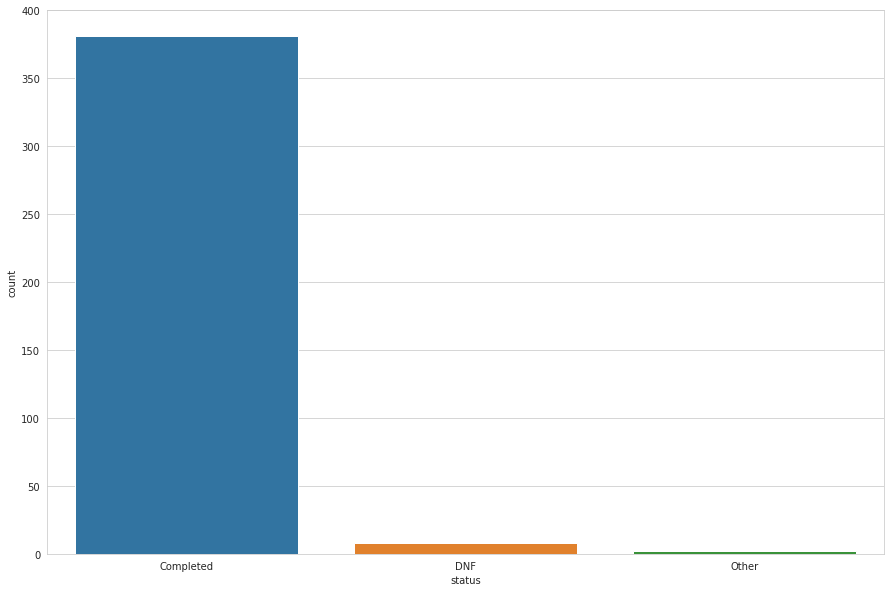

In [21]:
# visualisation of status data forthe whole dataset
plt.figure(figsize = (15,10))
sns.countplot(x = "status", data = df)
plt.show()

## DNF

In [22]:
# seperate data to DNF and completed (note there are "others")
DNF = df[df["status"]=="DNF"]
Completed = df[df["status"]=="Completed"]

In [23]:
# number of DNF pages
print(sum(DNF["pages"]), "pages were DNFed")

2375 pages were DNFed


In [24]:
# format of DNFed books
DNF["format"].value_counts()

Audiobook        7
Physical Book    1
Name: format, dtype: int64

In [25]:
# confirm whether there are duplicated authors in the DNF data
if DNF["author(s)"].nunique() ==DNF.shape[0]:
    print("There are",DNF["author(s)"].nunique(), "authors and no duplicated authors.")
else:
    print("There are",DNF["author(s)"].nunique(),"authors and include duplicates. You may wish to avoid some authors.")

There are 8 authors and no duplicated authors.


In [26]:
# confirm whether there are duplicated publishers in the DNF data

if DNF["author(s)"].nunique() ==DNF.shape[0]:
    print("There are",DNF["publisher"].nunique(), "publishers and no duplicates.")
else:
    print("There are",DNF["publisher"].nunique(),"publishers and include duplicates. You may wish to avoid some publishers.")

There are 8 publishers and no duplicates.


In [27]:
# confirm whether there are duplicated imprints in the DNF data

if DNF["Imprint"].nunique() ==DNF.shape[0]:
    print("There are",DNF["Imprint"].nunique(), "imprints and no duplicates.")
else:
    print("There are",DNF["Imprint"].nunique(),"imprints and include duplicates. You may wish to avoid some imprints.")

There are 8 imprints and no duplicates.


In [28]:
DNF["format"].unique()

array(['Audiobook', 'Physical Book'], dtype=object)

In [29]:
# review how the DNF audiobooks were consumed
DNF[DNF["format"]=="Audiobook"]["platform"].value_counts()

BorrowBox    3
Audible      2
Libby        2
Name: platform, dtype: int64

In [30]:
# distribution of publication data (year) for DNFed book
px.histogram(DNF, x = "publication_year", nbins=5)

In [31]:
# distribution of publication data (month) for DNFed book
fig = px.histogram(DNF, x = "publication_month", nbins=4)
fig.update_layout(xaxis_range = [1,12])

In [32]:
# distribution of genre for DNFed books
px.histogram(DNF, x = "genre",)

# completion date unknown

In [33]:
# extract books read but with no completion date
completion_date_unknown = Completed[Completed["completion date"].isnull()]

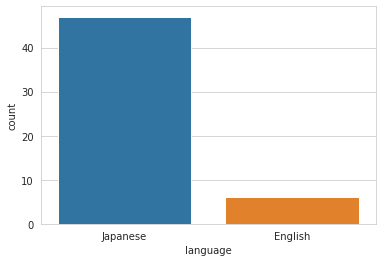

In [34]:
# view distribution of lauagues in the dataset
sns.countplot(x = "language", data = completion_date_unknown)
plt.show()

In [35]:
# Top 10 authors for books read but have no recorded completion date
completion_date_unknown["author(s)"].value_counts().head(10)

藤崎 都                      6
東野 圭吾                     6
日丸屋 秀和                    6
三上 延                      4
谷 瑞恵                      3
伊坂 幸太郎                    3
葉山 透                      2
Sir Arthur Conan Doyle    2
朝霧 カフカ                    2
川村 元気                     1
Name: author(s), dtype: int64

In [36]:
# visualisation of authors for books read but have no recorded completion date
px.histogram( completion_date_unknown, x = "author(s)")

In [37]:
# How were the books by the most popular authors consumed
Book_format = completion_date_unknown[(completion_date_unknown["author(s)"] =="東野 圭吾")|(completion_date_unknown["author(s)"] =="藤崎 都")]["format"].unique()
if len(Book_format) ==1: 
    print("The books by the most popular authors were consumed as a", "{}{}".format(Book_format[0].lower(),"."))
else: 
    print("The books by the most popular authors were consumed as a",Book_format)

The books by the most popular authors were consumed as a physical book.


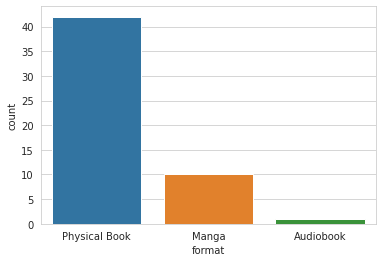

In [38]:
# distribution of formats thoughout the books read with no completion date
sns.countplot(x = "format", data = completion_date_unknown)
plt.show()

In [39]:
percent = round(((completion_date_unknown[completion_date_unknown["format"]== "Physical Book"].shape[0]/completion_date_unknown.shape[0])*100), 2)
print("{}{}".format(percent,"% of books with no completion date were consumed as a physical book."))

79.25% of books with no completion date were consumed as a physical book.


In [40]:
# information of the book with no completion date consumed as an audiobook
completion_date_unknown[completion_date_unknown["format"]== "Audiobook"]

,completion date,Title,author(s),pages,review,rating,status,format,platform,publisher,Imprint,publication date,type,genre,language,publication_year,publication_month,completion_year,completion_month
349,NaT,どうしても生きてる,朝井 リョウ,323,Yes,4.0,Completed,Audiobook,Audible,幻冬舎,幻冬舎文庫,2019-10-10,Fiction,Contemporary,Japanese,2019,10,NaN,NaN


In [41]:
# Imprints of books with no completion date
px.histogram( completion_date_unknown, x = "Imprint")

In [42]:
imprints = completion_date_unknown[(completion_date_unknown["author(s)"] =="東野 圭吾")|(completion_date_unknown["author(s)"] =="藤崎 都")|(completion_date_unknown["author(s)"] =="日丸屋 秀和")]["Imprint"].unique()

print("For the popular authors in the list of read books with no completion date, their books were published via the following imprints:",*imprints, sep= ", ")

For the popular authors in the list of read books with no completion date, their books were published via the following imprints:, 講談社文庫, 幻冬舎コミックス, 角川ルビー文庫, 文春文庫, 集英社文庫


In [43]:
# distribution of publishers for books with no completion date
px.histogram( completion_date_unknown, x = "publisher")

In [44]:
publisher = completion_date_unknown[(completion_date_unknown["author(s)"] =="東野 圭吾")|(completion_date_unknown["author(s)"] =="藤崎 都")|(completion_date_unknown["author(s)"] =="日丸屋 秀和")]["publisher"].unique()

print("For the popular authors in the list of read books with no completion date, their books were published by:",*publisher, sep= ", ")

For the popular authors in the list of read books with no completion date, their books were published by:, 講談社, 幻冬舎, KADOKAWA, 文藝春秋, 集英社


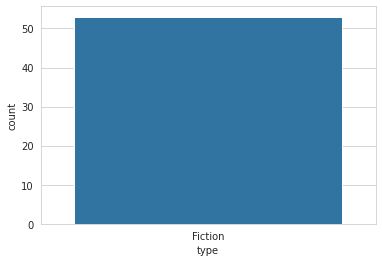

In [45]:
# type of books which were included in the books with no completion date
sns.countplot(x = "type", data = completion_date_unknown )
plt.show()

In [46]:
# genre of books with no completion date
px.histogram( completion_date_unknown, x = "genre")

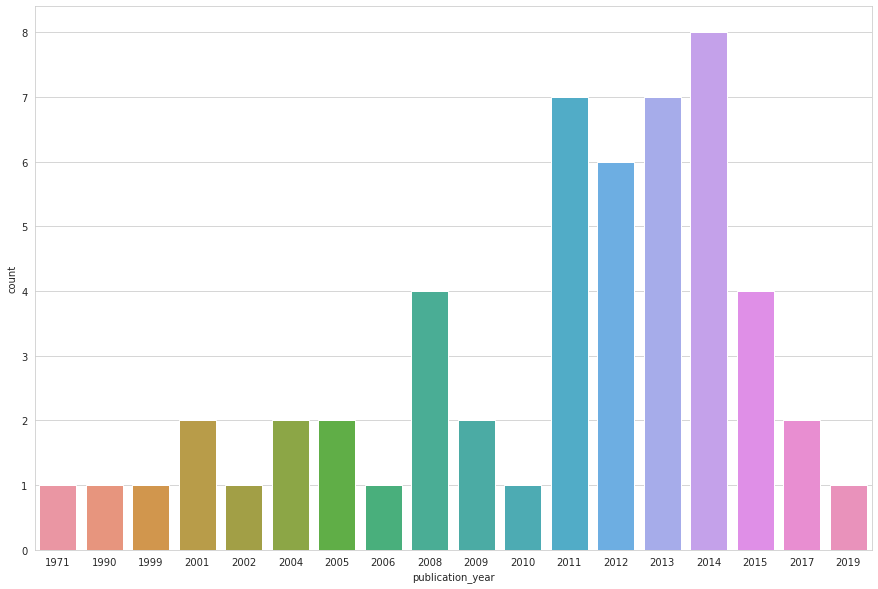

In [47]:
# year of publication of books with no completion date
plt.figure(figsize = (15,10))
sns.countplot(x = "publication_year", data = completion_date_unknown )
plt.show()

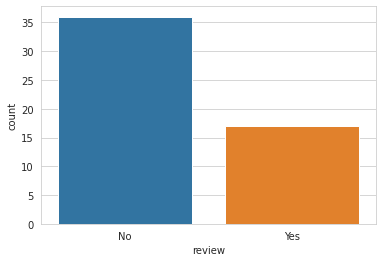

In [48]:
# review status of books with no completion date
sns.countplot(x = "review", data = completion_date_unknown,)
plt.show()

In [49]:
reviews = round((1-completion_date_unknown["rating"].isnull().sum()/completion_date_unknown.shape[0])*100,2)

print("{}{}".format(reviews,"% of books with no completion date have a rating."))

64.15% of books with no completion date have a rating.


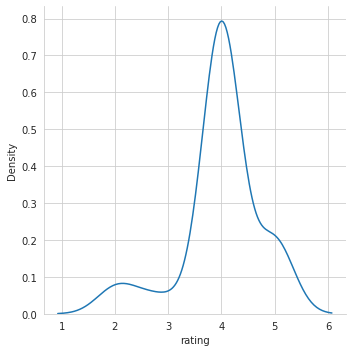

In [50]:
# kde distribution of ratings for books with no completion date
sns.displot(x = "rating", data = completion_date_unknown, kind= "kde")
plt.show()

In [51]:
print(completion_date_unknown["rating"].max(), "is the highest rating book for which no completion date was included.")

5.0 is the highest rating book for which no completion date was included.


# completion books

In [52]:
# exclude completed books with no completion date
Completed = Completed.dropna(subset = ["completion date"])

In [53]:
# distribution of completion dates and the pages read
fig = px.bar( Completed, x= "completion date", y = "pages")
fig.update_layout(yaxis_range = [0,1150])

In [54]:
Completed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 1 to 390
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   completion date    328 non-null    datetime64[ns]
 1   Title              328 non-null    object        
 2   author(s)          328 non-null    object        
 3   pages              328 non-null    int64         
 4   review             328 non-null    object        
 5   rating             311 non-null    float64       
 6   status             328 non-null    object        
 7   format             328 non-null    object        
 8   platform           88 non-null     object        
 9   publisher          328 non-null    object        
 10  Imprint            328 non-null    object        
 11  publication date   328 non-null    datetime64[ns]
 12  type               328 non-null    object        
 13  genre              328 non-null    object        
 14  language  

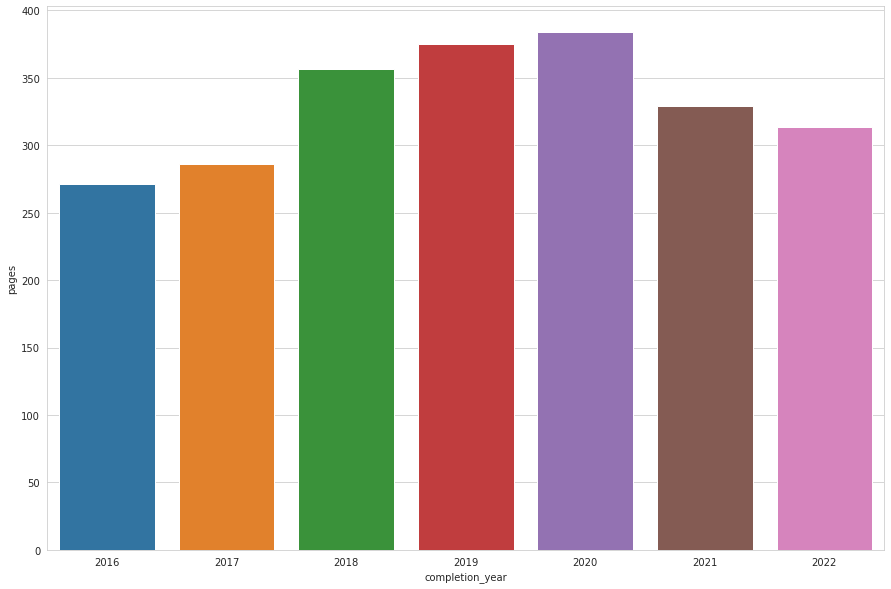

In [55]:
# Number of pages read since 2016 to 2022
plt.figure(figsize = (15,10))
sns.barplot( x= Completed["completion_year"].astype("int"), y = "pages", data = Completed, ci = None)
plt.show()

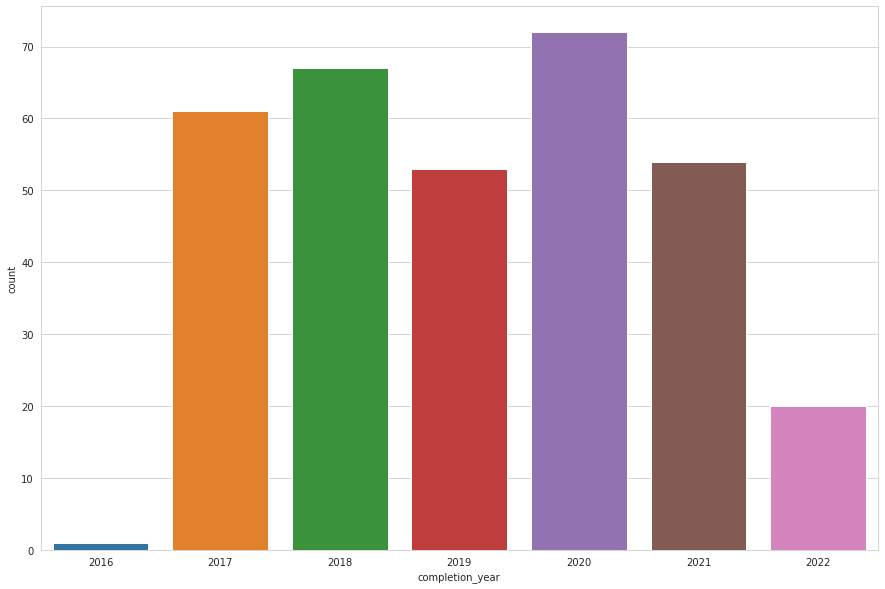

In [56]:
# Number of books read since 2017
plt.figure(figsize = (15,10))
sns.countplot( x= Completed["completion_year"].astype("int"),data = Completed)
plt.show()

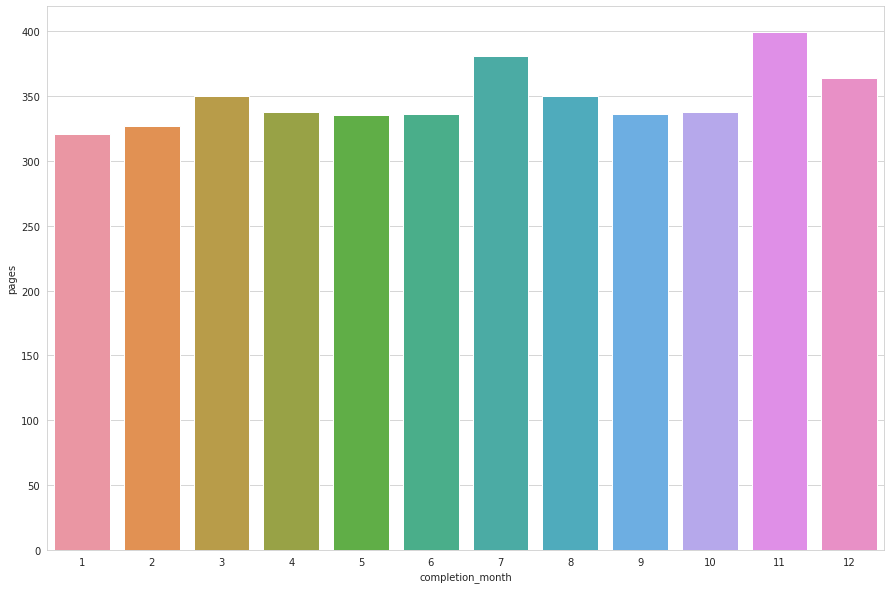

In [57]:
# Number of books read in various months
plt.figure(figsize = (15,10))
sns.barplot( x= Completed["completion_month"].astype("int"), y = "pages", data = Completed,ci = None)
plt.show()

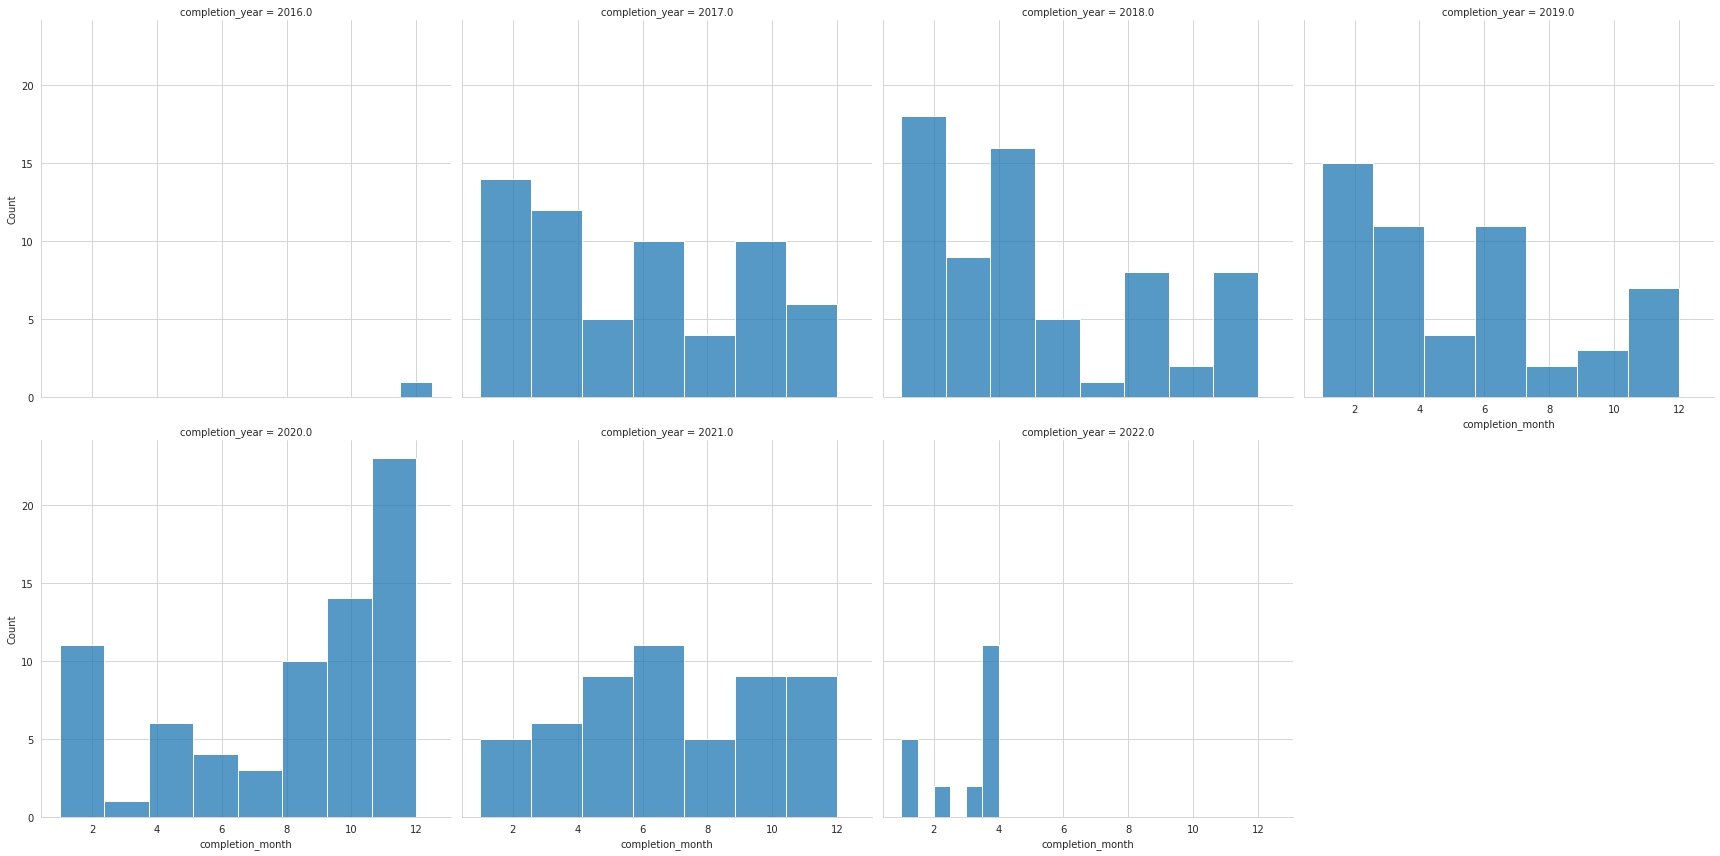

In [58]:
g = sns.FacetGrid(Completed, col='completion_year', height=6, col_wrap=4)
g.map(sns.histplot, "completion_month",)
plt.show()

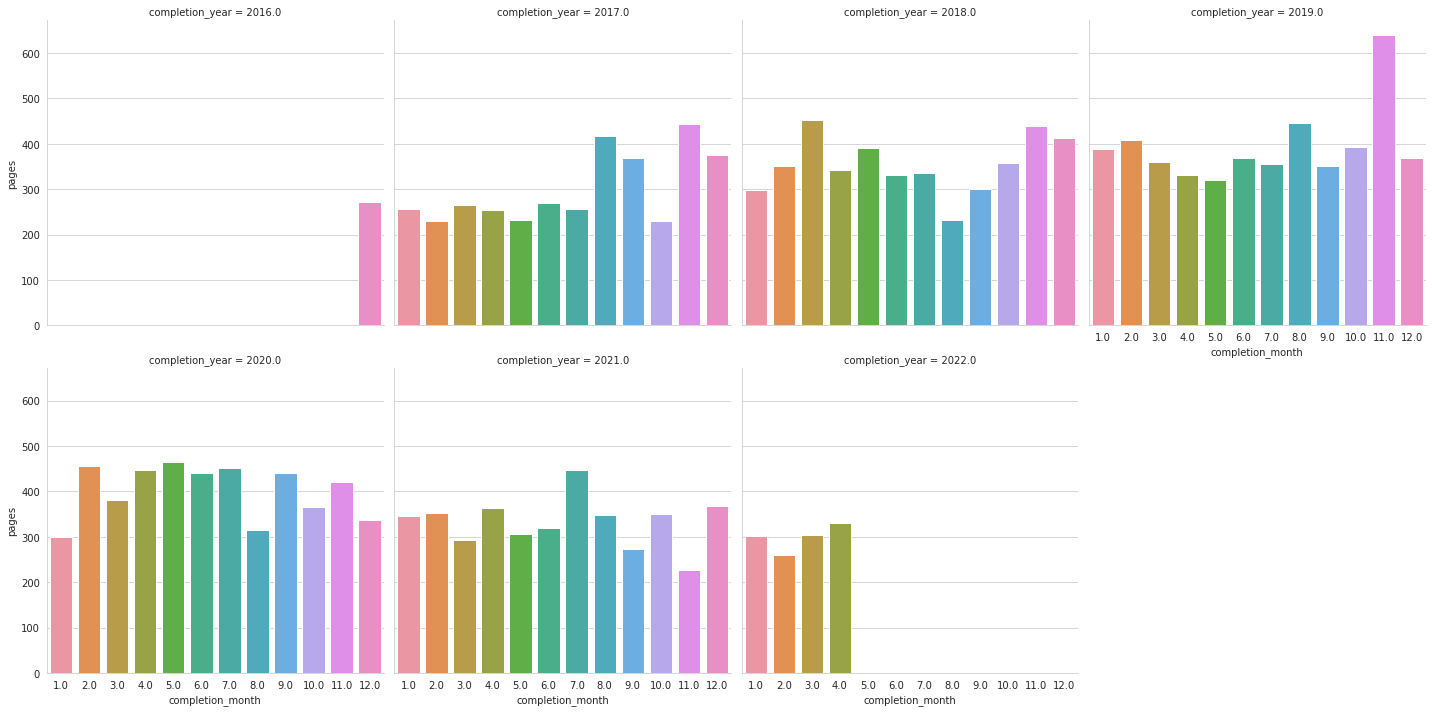

In [59]:
sns.catplot(data = Completed, x="completion_month", y = "pages", col = "completion_year", kind = "bar", col_wrap=4,ci = None)

In [60]:
Completed["Title"].nunique()

317

In [61]:
rereads = df["Title"].value_counts().rename_axis ("titles").reset_index(name = "reads")
rereads[rereads["reads"]>1].head()

,titles,reads
0,ぼくは明日、昨日のきみとデートする,2
1,Economics: The User's Guide,2
2,Economics,2
3,Magpie Murders,2
4,妖怪アパートの幽雅な日常 1,2


In [62]:
rereads[rereads["reads"]>1].shape[0]

13

In [63]:
print(round((1 -Completed["Title"].nunique()/Completed.shape[0])*100,2), "% of read books were rereads")

3.35 % of read books were rereads


In [64]:
first_reads = Completed.drop_duplicates(subset = ["Title"], keep = "first"  )

fav_authors = first_reads["author(s)"].value_counts().rename_axis ("author(s)").reset_index(name = "books/reads")
fav_authors[fav_authors["books/reads"]>1].head()

,author(s),books/reads
0,東野 圭吾,15
1,谷 瑞恵,13
2,香月 日輪,8
3,伊坂 幸太郎,7
4,ふじた,6


In [65]:
px.bar(fav_authors[fav_authors["books/reads"]>2], x="author(s)", y = "books/reads" )

<AxesSubplot:xlabel='language', ylabel='count'>

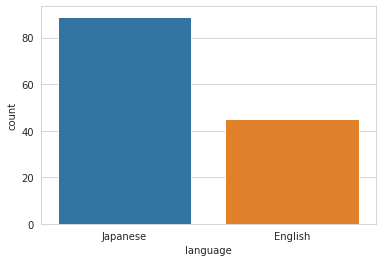

In [66]:
fav_authors = fav_authors[fav_authors["books/reads"]>2]

sns.countplot(x = "language", data = Completed[Completed["author(s)"].isin(fav_authors["author(s)"])])

In [67]:
ratio = (sum(Completed[Completed["author(s)"].isin(fav_authors["author(s)"])]["language"]=="Japanese")/Completed[Completed["author(s)"].isin(fav_authors["author(s)"])].shape[0])*100
print("There were", round(ratio,2),"% more Japanese rereads than English rereads")

There were 66.42 % more Japanese rereads than English rereads


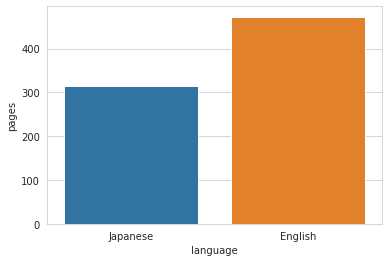

In [68]:
fav_authors = fav_authors[fav_authors["books/reads"]>2]

sns.barplot(x = "language", y = "pages", data = Completed[Completed["author(s)"].isin(fav_authors["author(s)"])], ci = None)
plt.show()

In [69]:
Completed["pages"].describe()

count    328.000000
mean     345.042683
std      132.200471
min       31.000000
25%      259.750000
50%      327.000000
75%      400.000000
max      912.000000
Name: pages, dtype: float64

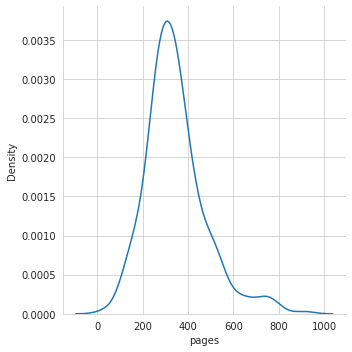

In [70]:
sns.displot(x = "pages", data = Completed, kind= "kde")
plt.show()

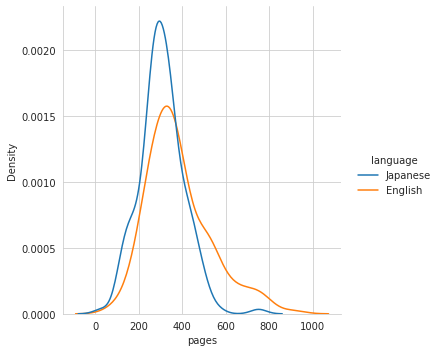

In [71]:
sns.displot(x = "pages", data = Completed, kind= "kde", hue = "language")
plt.show()

<AxesSubplot:xlabel='review', ylabel='count'>

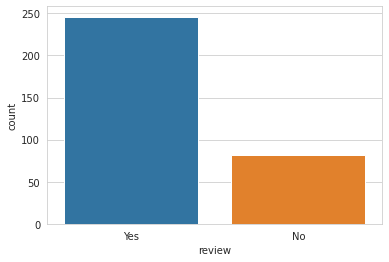

In [72]:
sns.countplot(x = "review", data = Completed)

In [73]:
print(round((Completed[Completed["review"]=="Yes"].shape[0]/Completed.dropna(subset = ["review"]).shape[0])*100, 1) ,"% of books read have been reviewed")

75.0 % of books read have been reviewed


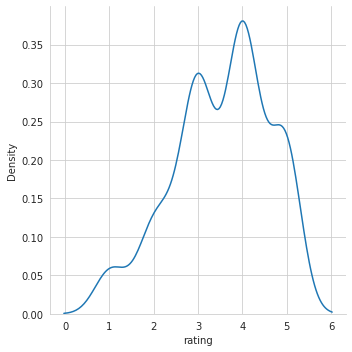

In [74]:
sns.displot(x = "rating", data = Completed, kind= "kde")

<AxesSubplot:xlabel='format', ylabel='count'>

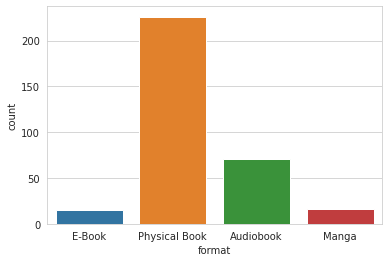

In [75]:
sns.countplot(x = "format", data = Completed)

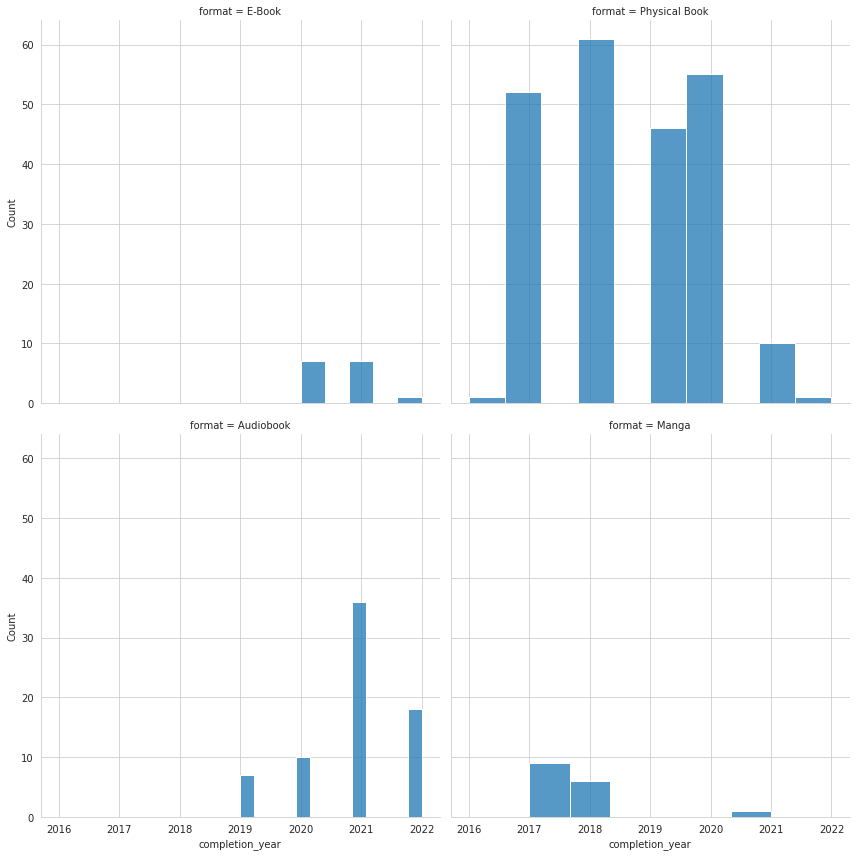

In [76]:
g = sns.FacetGrid(Completed, col='format', height=6, col_wrap=2)
g.map(sns.histplot, "completion_year")
plt.show()

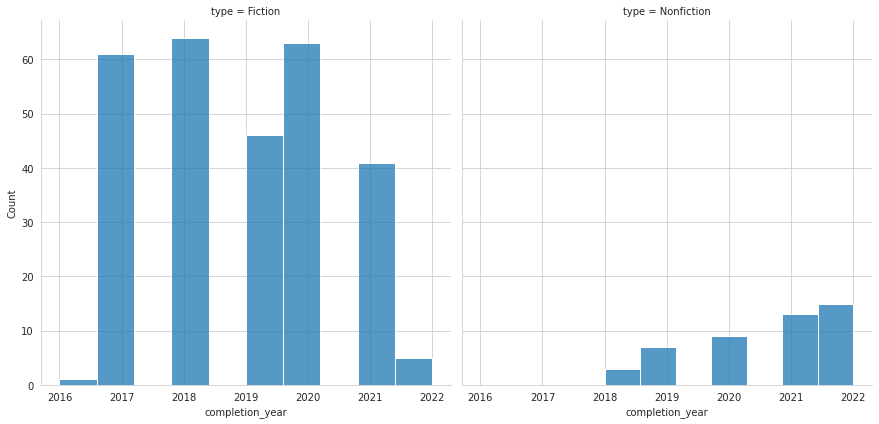

In [77]:
g = sns.FacetGrid(Completed, col='type', height=6, col_wrap=4)
g.map(sns.histplot, "completion_year")
plt.show()

<AxesSubplot:xlabel='format', ylabel='count'>

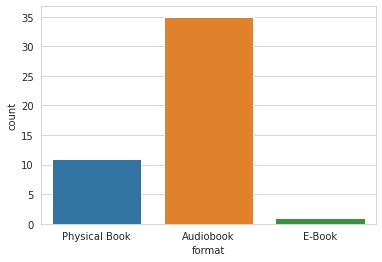

In [78]:
sns.countplot(x = "format", data = Completed[Completed["type"]=="Nonfiction"])

<AxesSubplot:xlabel='format', ylabel='count'>

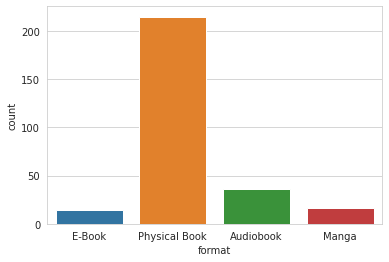

In [79]:
sns.countplot(x = "format", data = Completed[Completed["type"]=="Fiction"])

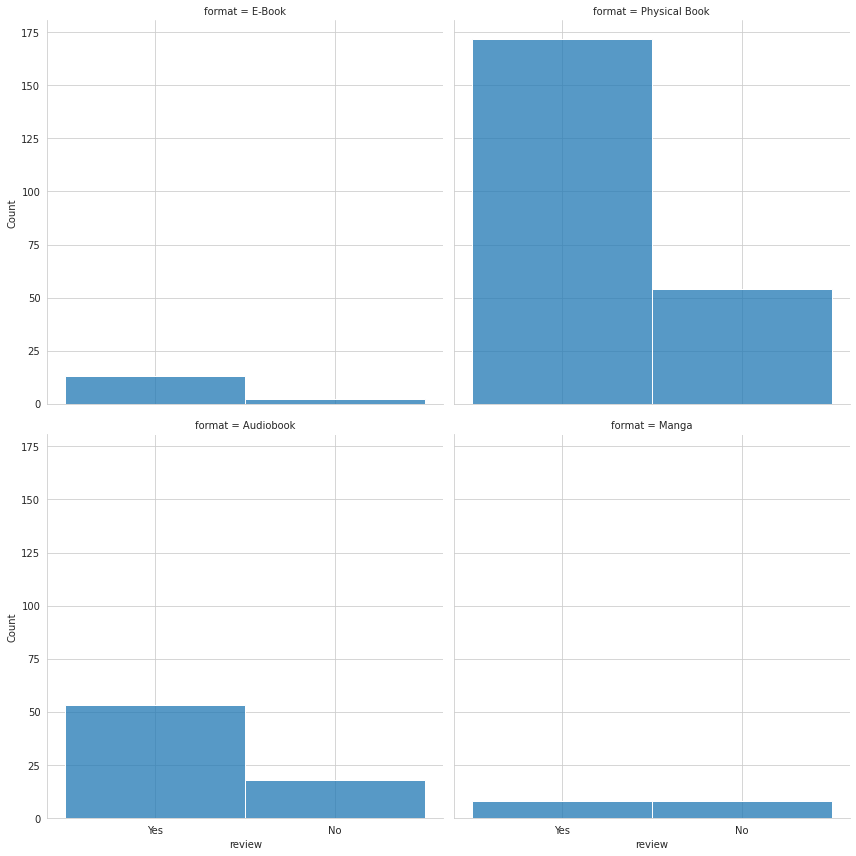

In [80]:
g = sns.FacetGrid(Completed, col='format', height=6, col_wrap=2)
g.map(sns.histplot, "review")
plt.show()

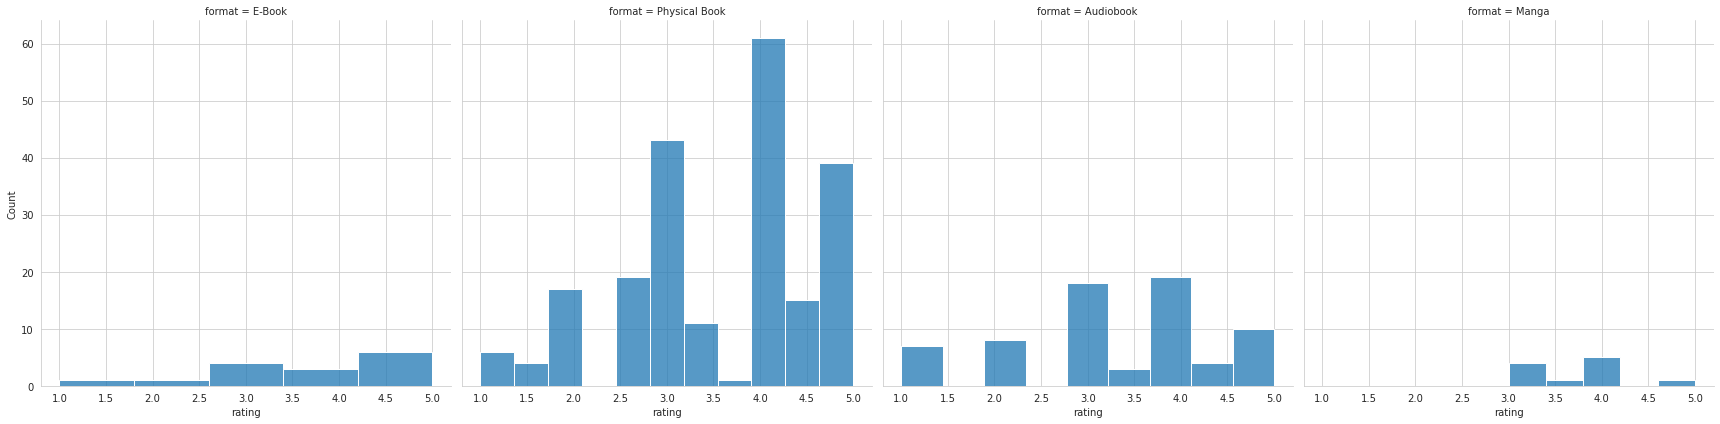

In [81]:
g = sns.FacetGrid(Completed, col='format', height=6, col_wrap=4)
g.map(sns.histplot, "rating")
plt.show()

<AxesSubplot:xlabel='platform', ylabel='count'>

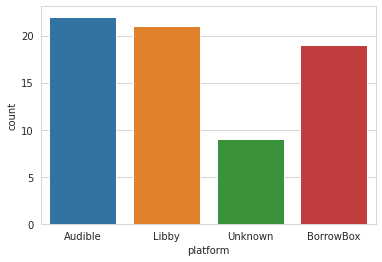

In [82]:
sns.countplot(x = "platform", data = Completed[Completed["format"]=="Audiobook"])

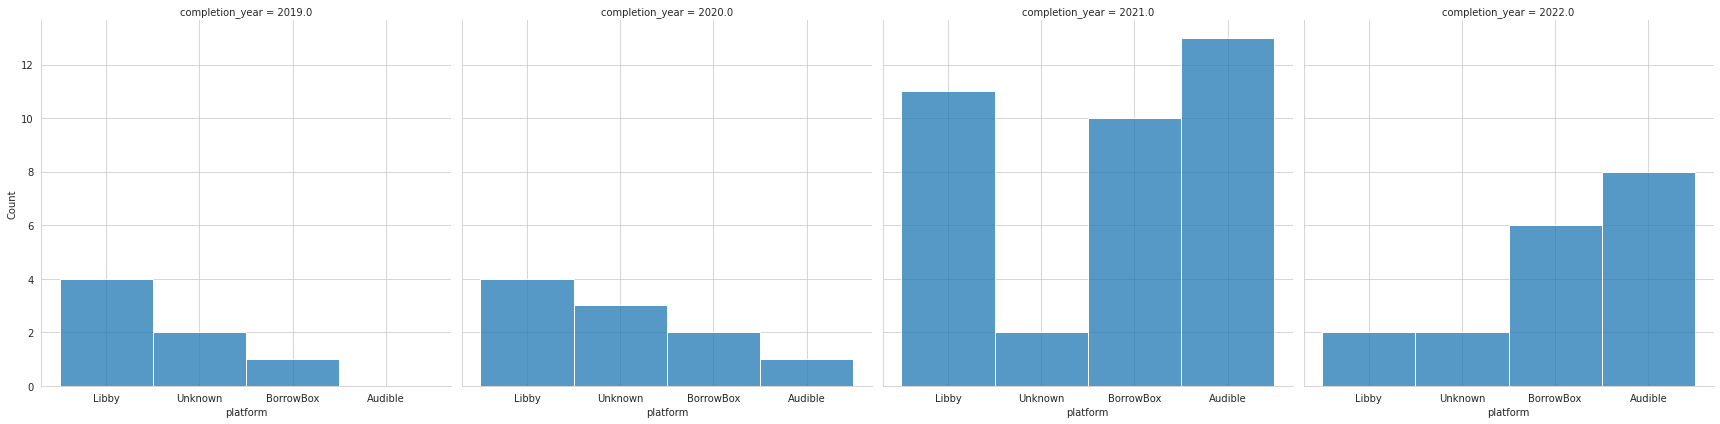

In [83]:
g = sns.FacetGrid(Completed[Completed["format"]=="Audiobook"], col='completion_year', height=6, col_wrap=4)
g.map(sns.histplot, "platform")
plt.show()

In [84]:
print(first_reads["publisher"].nunique(), first_reads["Imprint"].nunique())


56 114


In [85]:
publisher = first_reads["publisher"].value_counts().rename_axis ("publisher").reset_index(name = "books/reads")
publisher[publisher["books/reads"]>1].head(10)

,publisher,books/reads
0,Penguin Random House,55
1,KADOKAWA,52
2,集英社,23
3,講談社,22
4,HarperCollins,17
5,Macmillan Publishers,17
6,文藝春秋,13
7,Orion,12
8,新潮社,9
9,Hachette Book,9


In [86]:
Imprint = first_reads["Imprint"].value_counts().rename_axis ("Imprint").reset_index(name = "books/reads")
Imprint[Imprint["books/reads"]>1].head(10)

,Imprint,books/reads
0,角川文庫,20
1,講談社文庫,18
2,コバルト文庫,15
3,Penguin,13
4,文春文庫,13
5,Penguin Classics,13
6,メディアワークス文庫,11
7,Picador,9
8,角川ホラー文庫,8
9,Gollancz,7


In [87]:
Japanese_first_reads = first_reads[first_reads["language"]=="Japanese"]
Imprint = Japanese_first_reads["Imprint"].value_counts().rename_axis ("Imprint").reset_index(name = "books/reads")
Imprint["Imprint"].nunique()

43

In [88]:
Imprint[Imprint["books/reads"]>1].head(10)

,Imprint,books/reads
0,角川文庫,20
1,講談社文庫,18
2,コバルト文庫,15
3,文春文庫,13
4,メディアワークス文庫,11
5,角川ホラー文庫,8
6,一迅社,6
7,新潮文庫,6
8,アスキーメディアワークス,5
9,光文社文庫,5


In [89]:
English_first_reads = first_reads[first_reads["language"]=="English"]
Imprint = English_first_reads["Imprint"].value_counts().rename_axis ("Imprint").reset_index(name = "books/reads")
Imprint["Imprint"].nunique()

72

In [90]:
Imprint[Imprint["books/reads"]>1].head(10)

,Imprint,books/reads
0,Penguin,13
1,Penguin Classics,12
2,Picador,9
3,Gollancz,7
4,Vintage Classics,6
5,HarperCollins,6
6,Wordsworth Editions,5
7,Orion Children's Books,5
8,Vintage,4
9,Black Swan,4


In [91]:
px.histogram( Completed, x = "genre")

In [92]:
px.histogram( Completed[Completed["language"]=="Japanese"], x = "genre")

In [93]:
px.histogram( Completed[Completed["language"]=="English"], x = "genre")

In [94]:
English_books = Completed[(Completed["language"]=="English")&(Completed["completion_year"]>2016)]
English_popular_genres = English_books["genre"].value_counts().rename_axis ("Genre").reset_index(name = "books/reads")

Top_genres = English_popular_genres.head(10)

popular_genres = Completed[Completed["genre"].isin(Top_genres["Genre"])]

px.histogram( popular_genres[popular_genres["completion_year"]==2017], x = "genre", )